# Notes

- old dataset 以下数据异常

sample：168-211

sensor：5-7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## 读入数据

In [2]:
old_data_x = np.load("../golf_dataset/olddata/dataset.npz")["arr_0"]
old_data_y = np.load("../golf_dataset/olddata/labels.npz")["arr_0"]
new_data_x = np.load("../golf_dataset/newdata/Data.npz")["arr_0"]
print(old_data_x.shape)
print(old_data_y.shape)
print(new_data_x.shape)

(213, 10, 1000)
(213,)
(815, 1500, 18)


### 旧数据

(213, 10, 1000)

213个样本，10种传感器，1000采样点

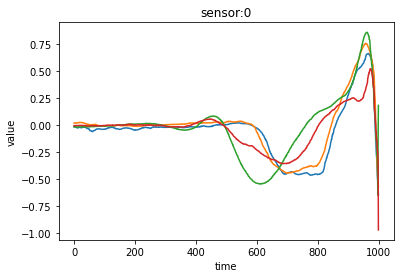

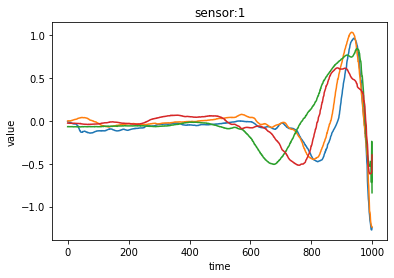

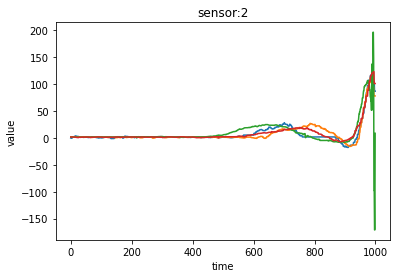

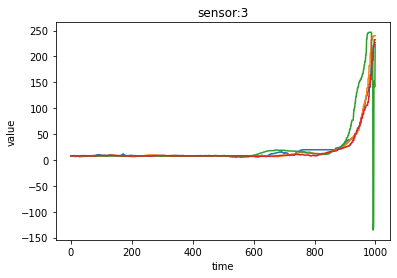

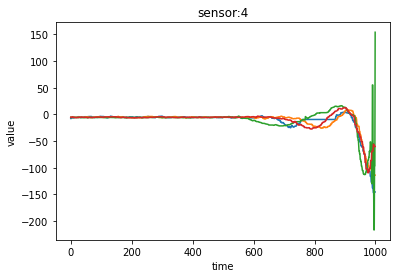

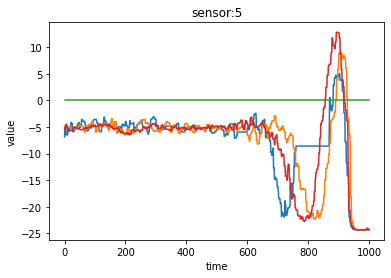

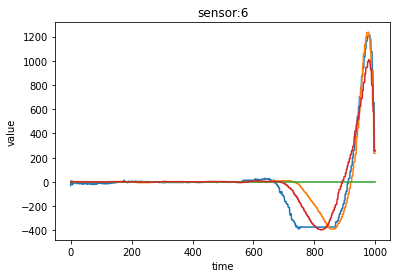

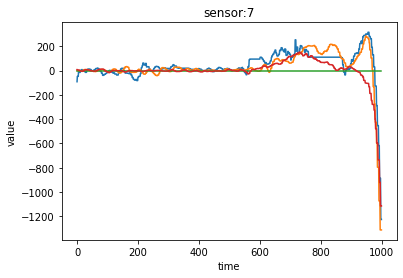

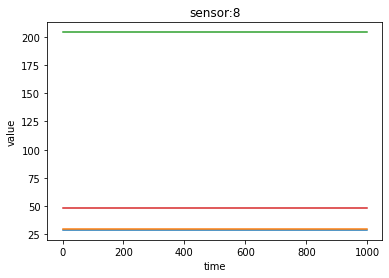

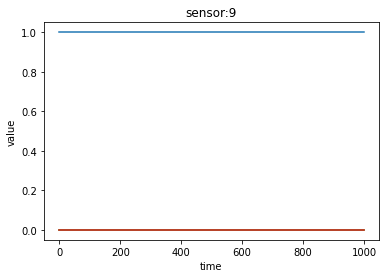

In [3]:
num_samples = 4
samples = np.random.randint(old_data_x.shape[0]-1, size=num_samples)
for sensor in range(old_data_x.shape[1]):
    for sample in samples:
        plt.plot(old_data_x[sample, sensor, :])
    plt.xlabel('time')
    plt.ylabel('value')
    plt.title('sensor:{}'.format(sensor))
    plt.show()

**舍弃后两个传感器**

In [4]:
old_data_x = np.delete(old_data_x, (8, 9), axis=1)

**标准化**

In [5]:
std = MinMaxScaler()
for i in range(8):
    old_data_x[:, i, :] = std.fit_transform(old_data_x[:, i, :].T).T

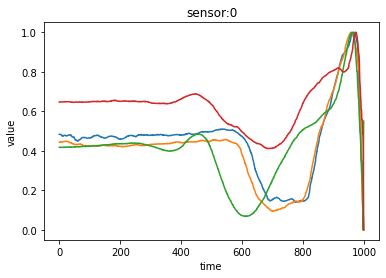

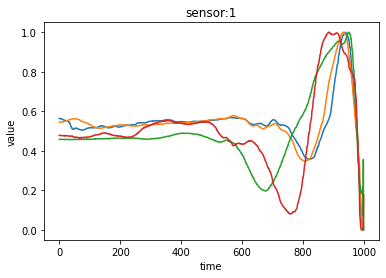

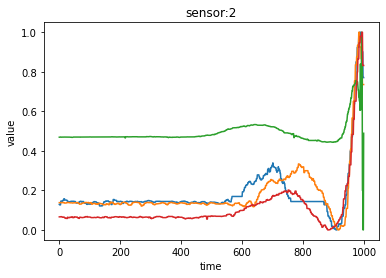

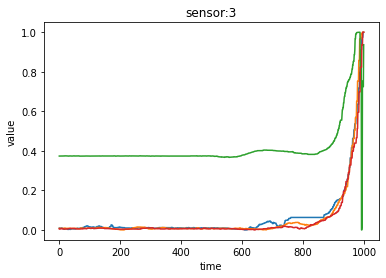

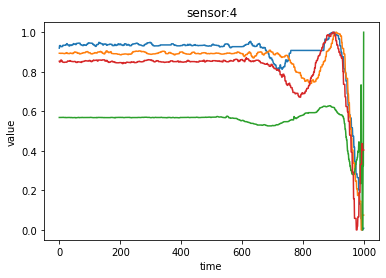

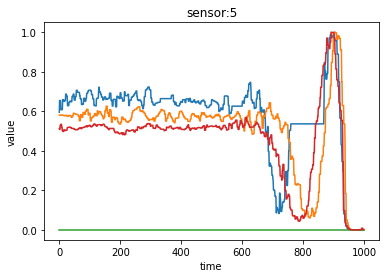

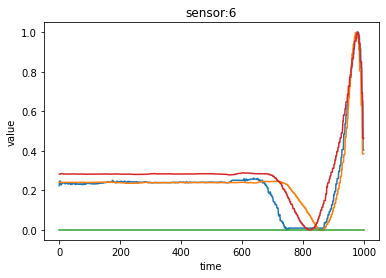

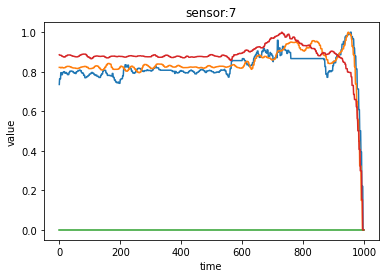

In [6]:
for sensor in range(old_data_x.shape[1]):
    for sample in samples:
        plt.plot(old_data_x[sample, sensor, :])
    plt.xlabel('time')
    plt.ylabel('value')
    plt.title('sensor:{}'.format(sensor))
    plt.show()

**时间裁剪**

time: 350-995

In [7]:
old_data_x = np.delete(old_data_x, list(range(0, 350))+list(range(995, 1000)), axis=2)

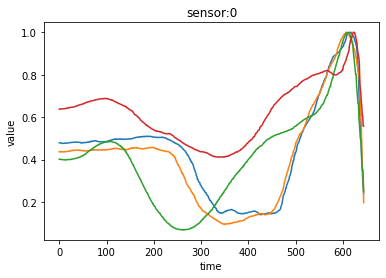

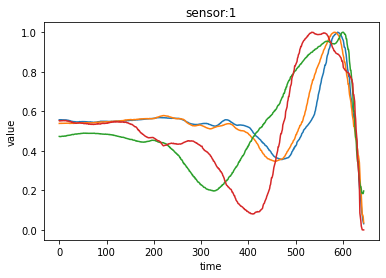

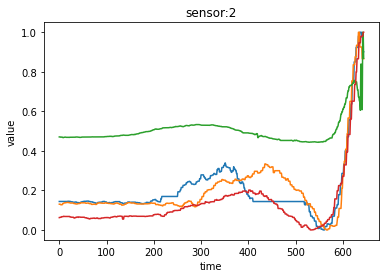

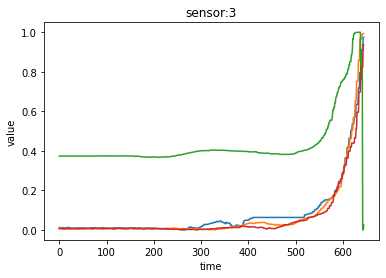

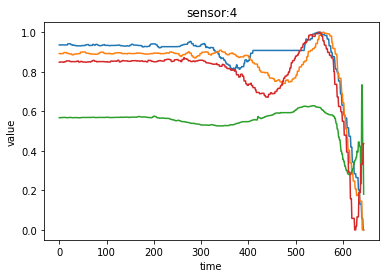

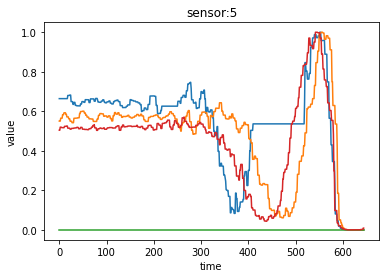

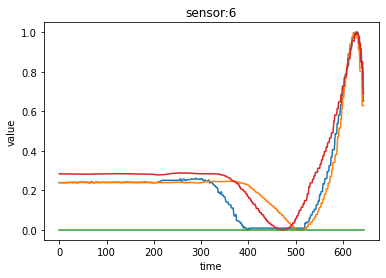

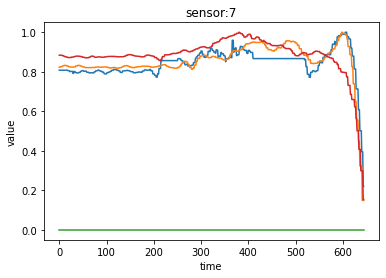

In [8]:
for sensor in range(old_data_x.shape[1]):
    for sample in samples:
        plt.plot(old_data_x[sample, sensor, :])
    plt.xlabel('time')
    plt.ylabel('value')
    plt.title('sensor:{}'.format(sensor))
    plt.show()

**保存数据**

In [9]:
np.save('./old_data_preprocess_no_aug', old_data_x)

**异常检测**

sample：168-211

sensor：5-7

数据异常

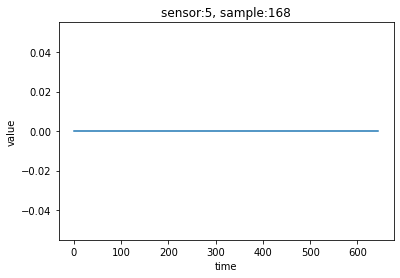

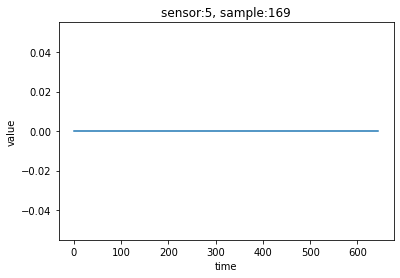

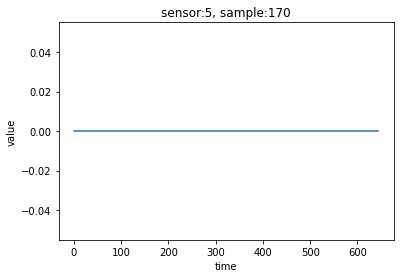

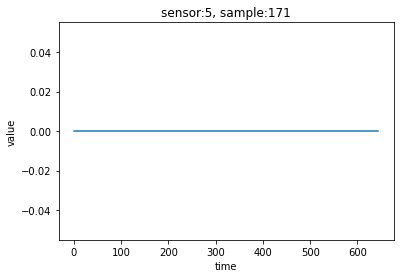

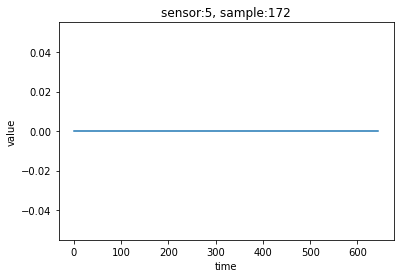

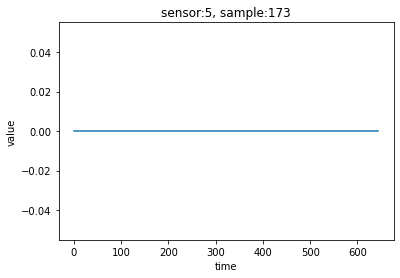

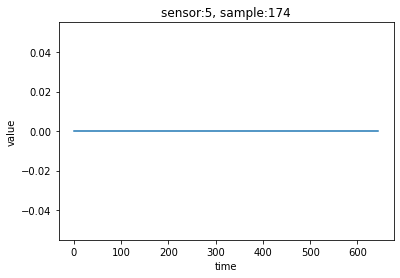

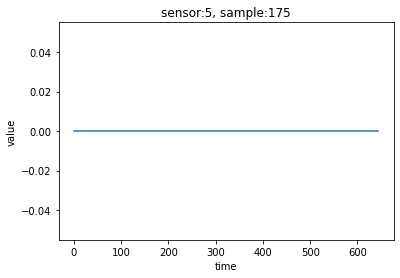

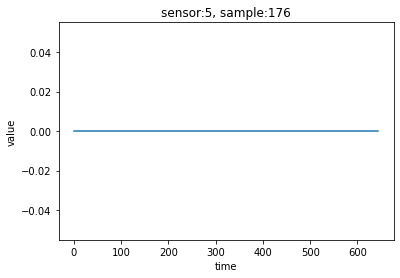

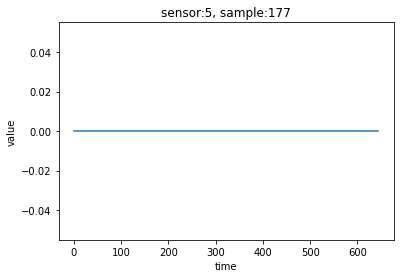

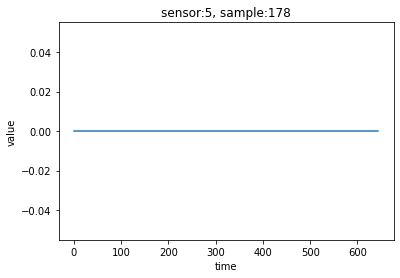

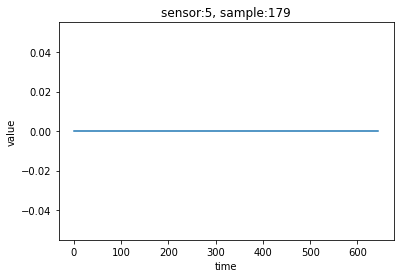

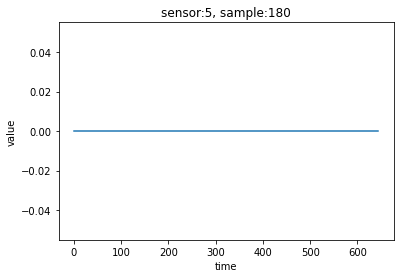

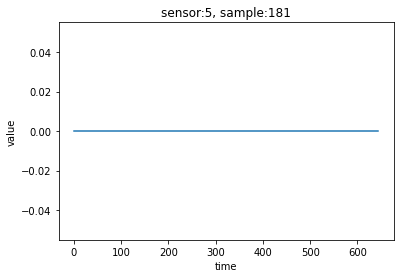

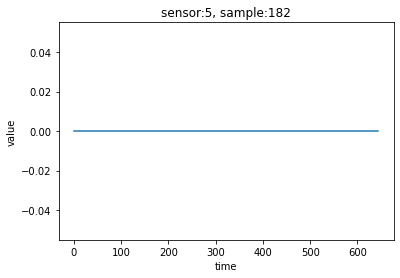

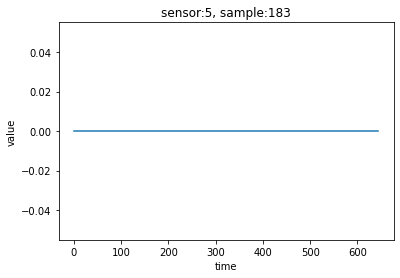

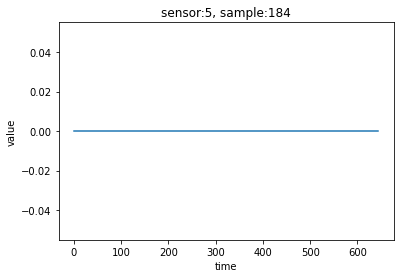

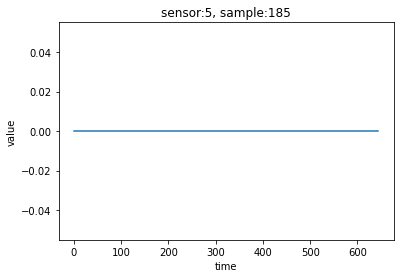

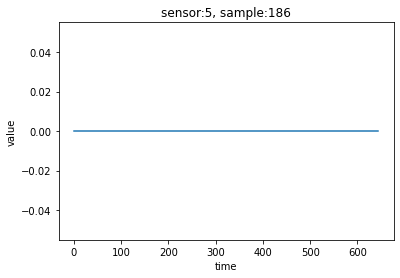

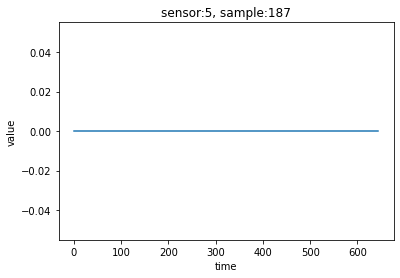

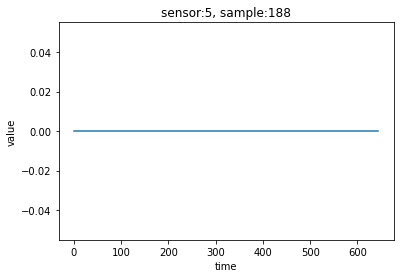

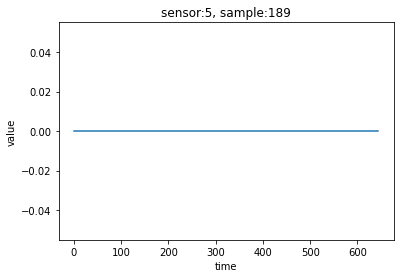

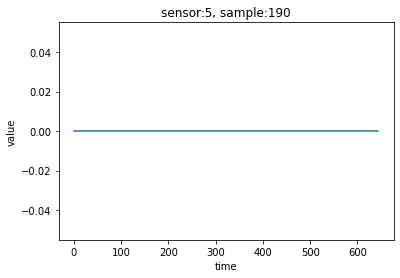

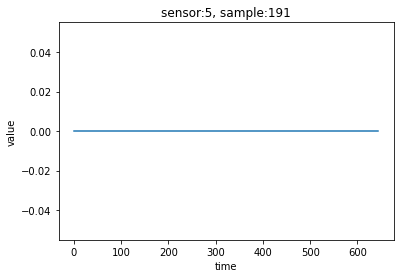

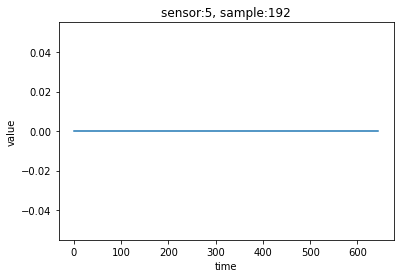

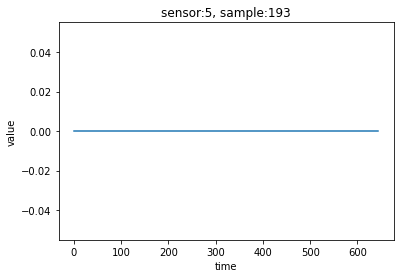

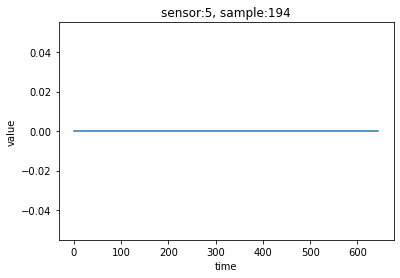

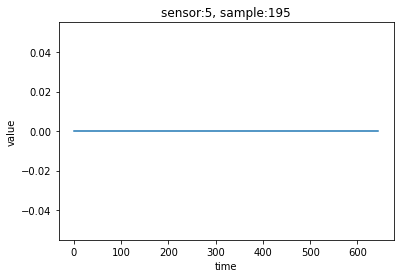

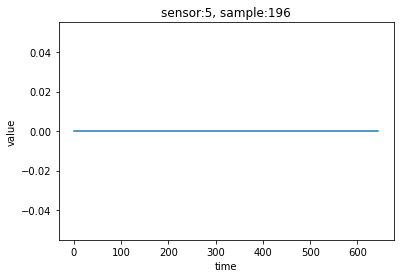

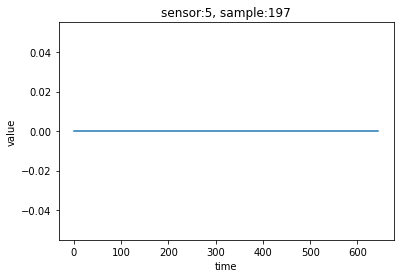

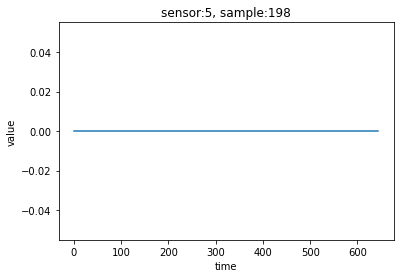

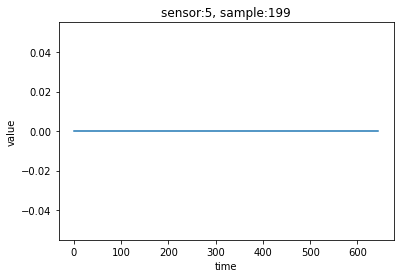

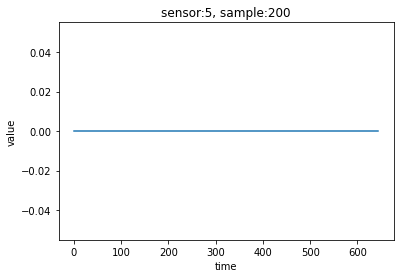

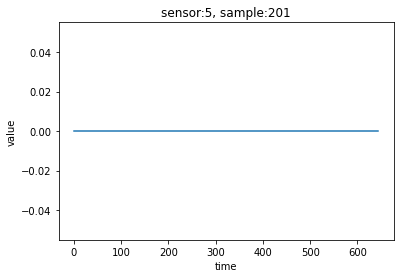

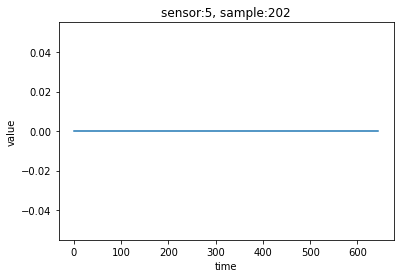

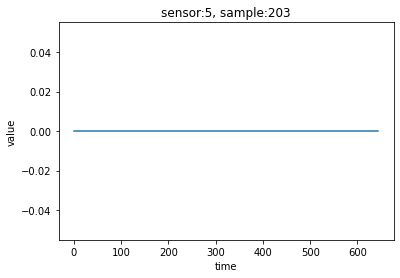

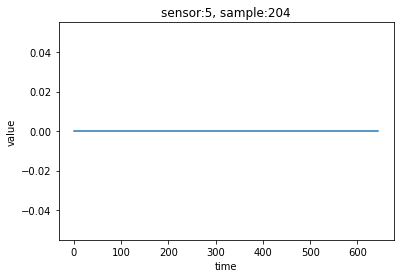

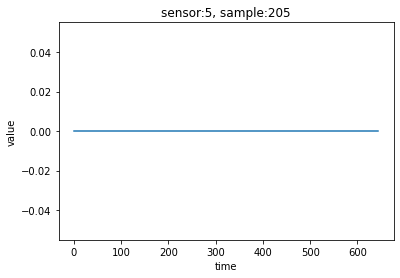

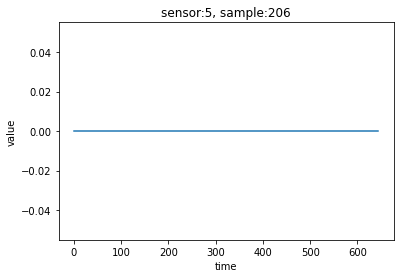

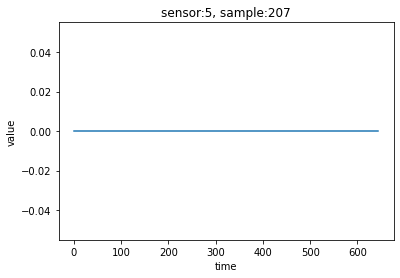

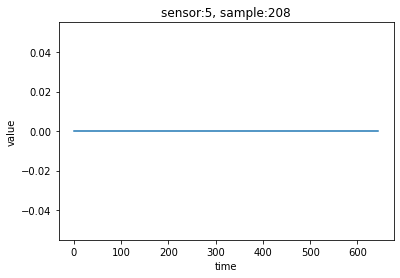

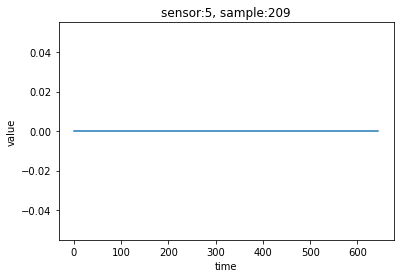

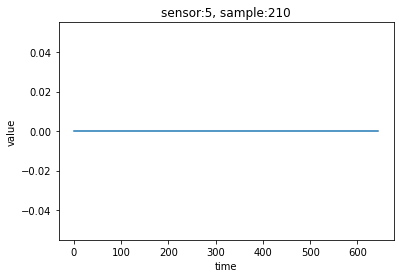

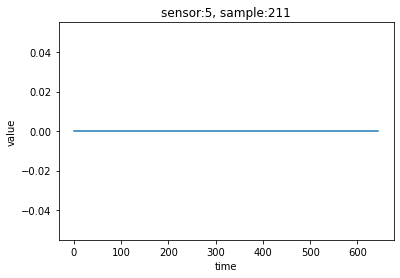

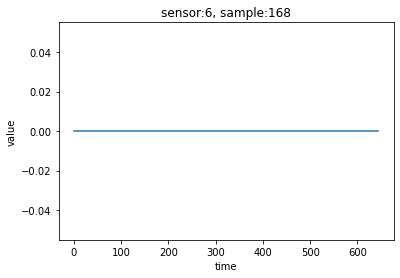

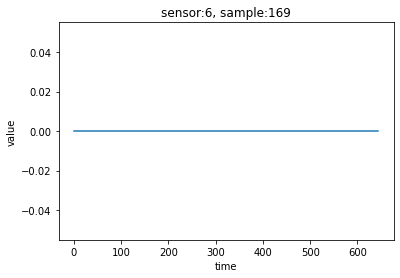

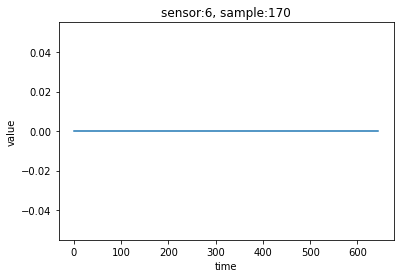

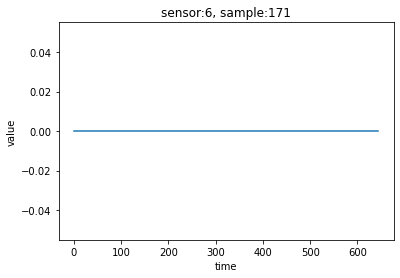

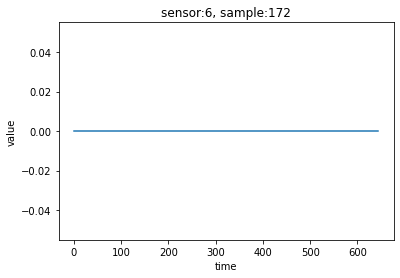

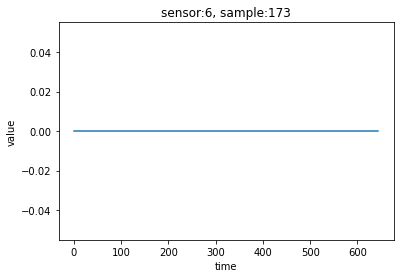

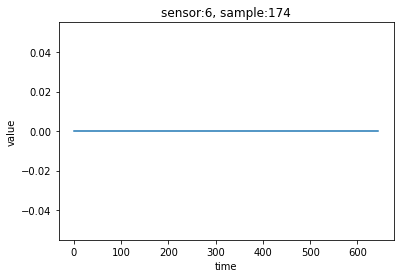

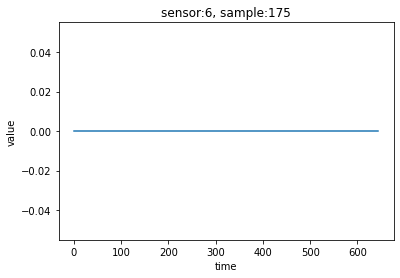

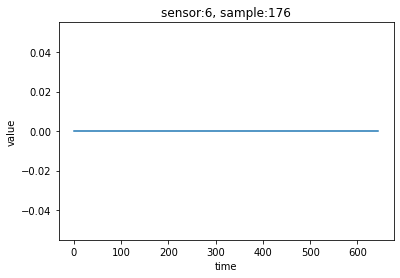

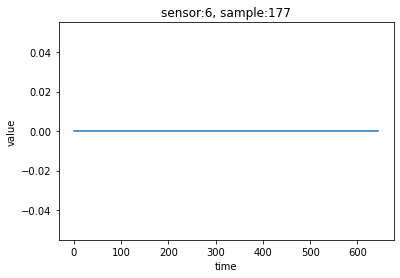

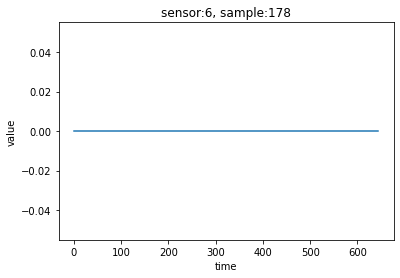

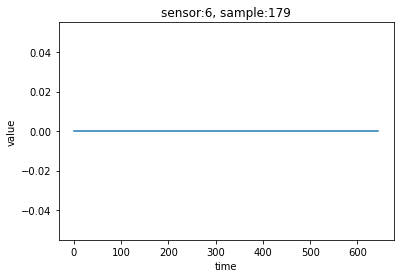

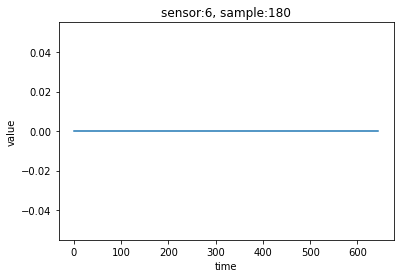

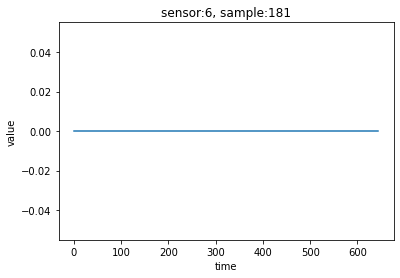

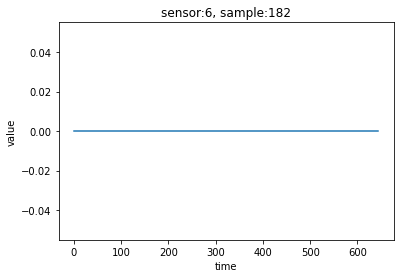

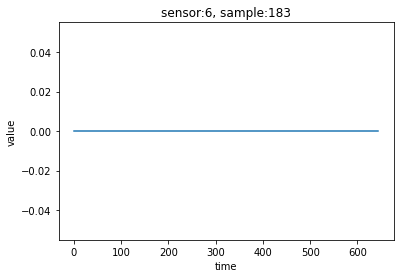

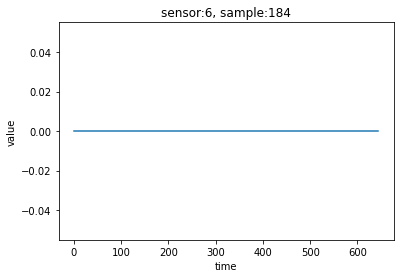

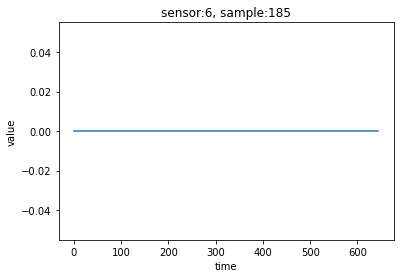

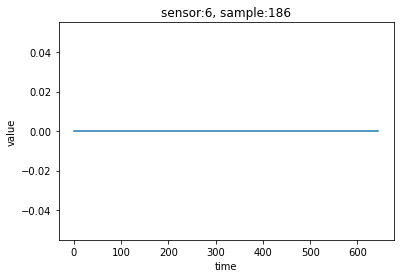

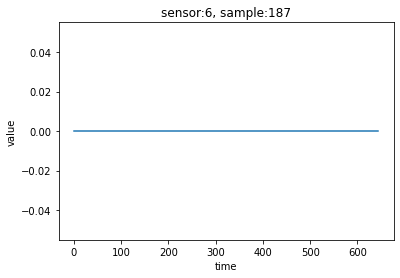

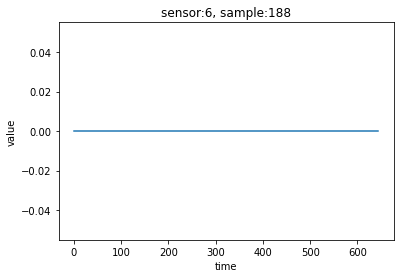

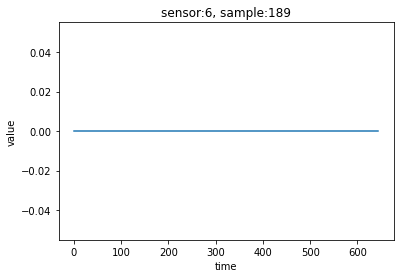

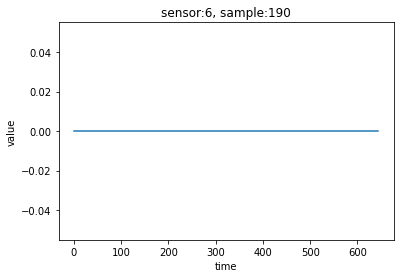

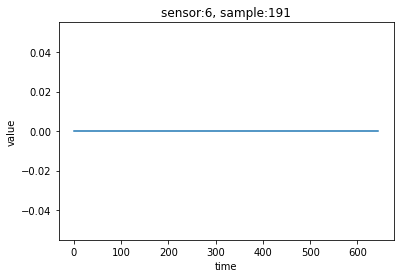

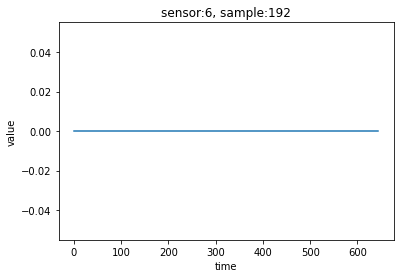

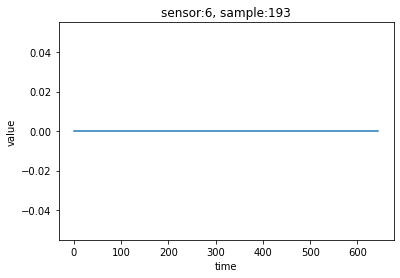

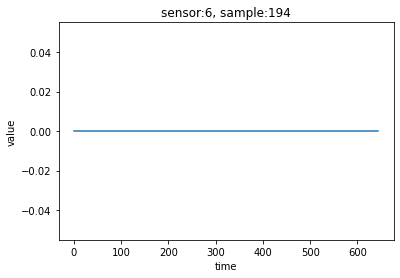

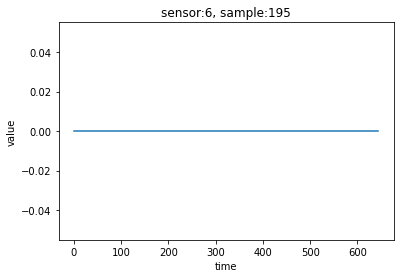

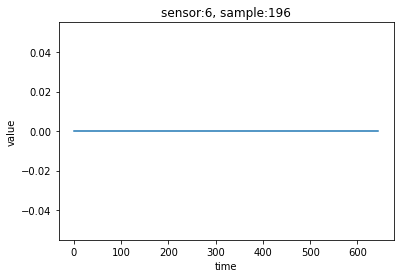

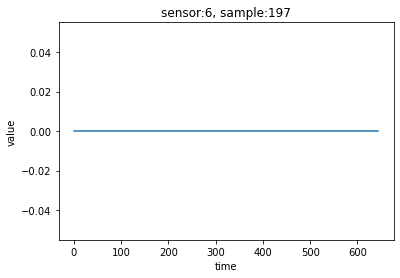

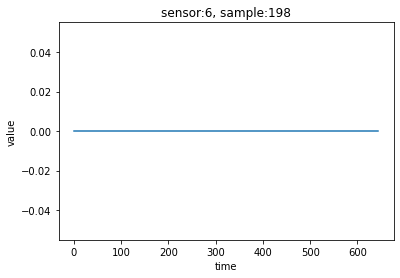

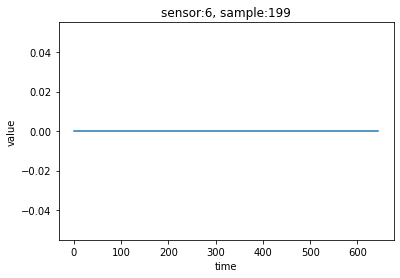

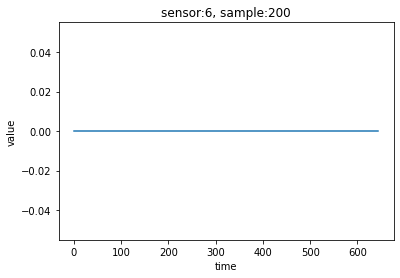

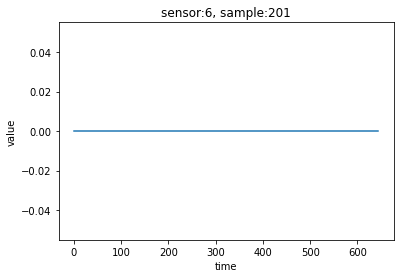

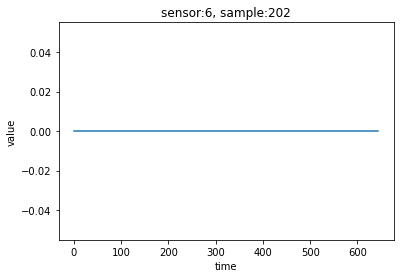

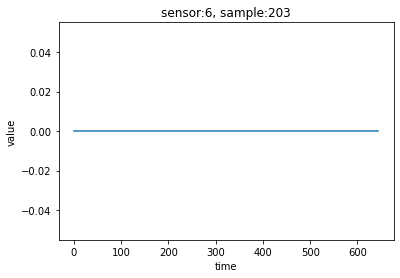

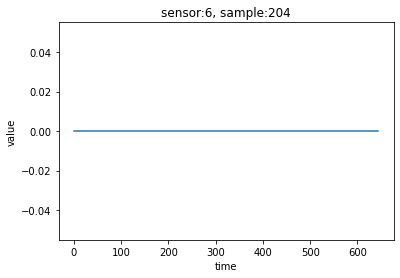

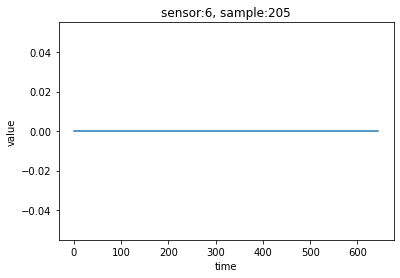

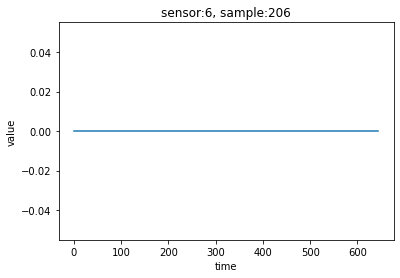

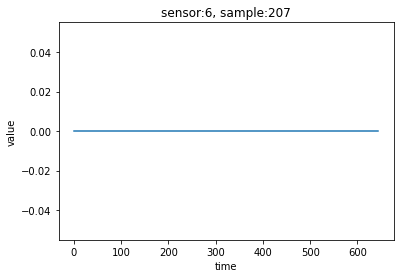

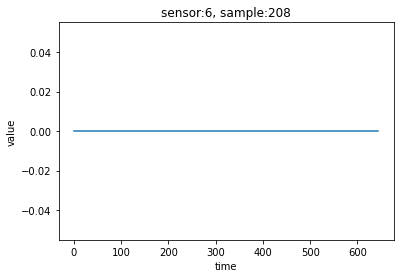

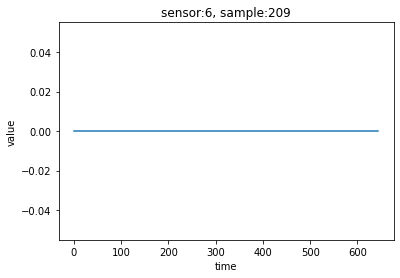

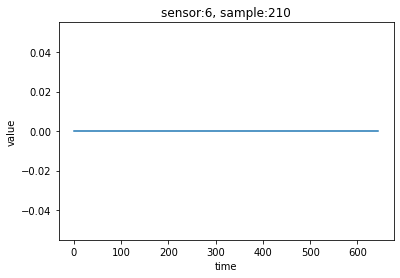

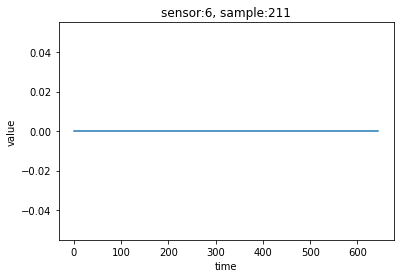

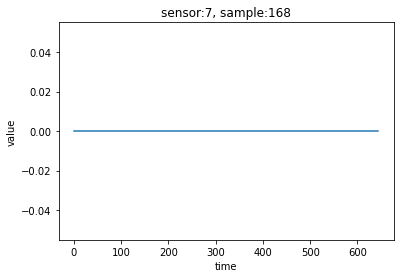

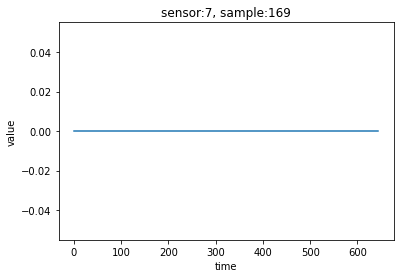

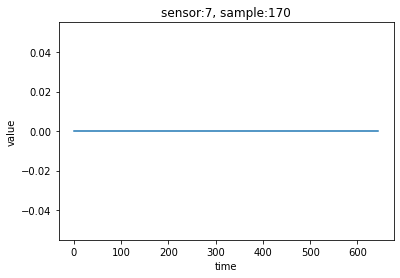

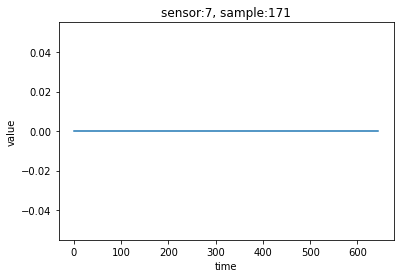

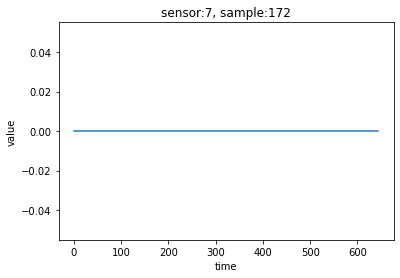

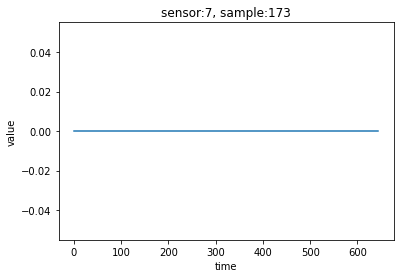

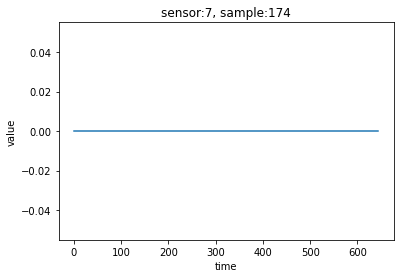

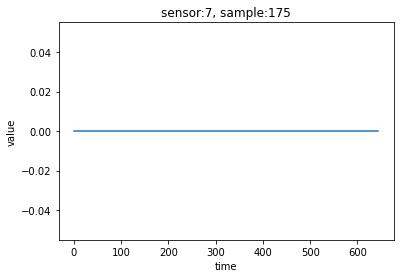

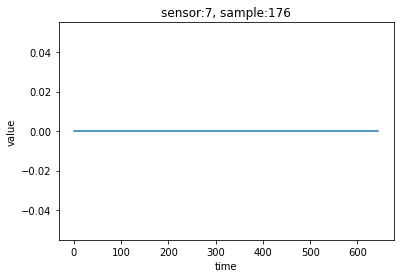

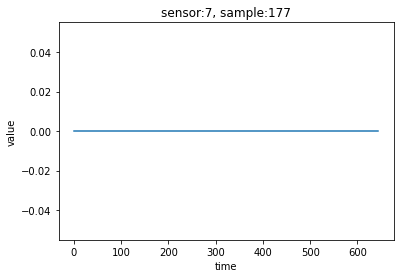

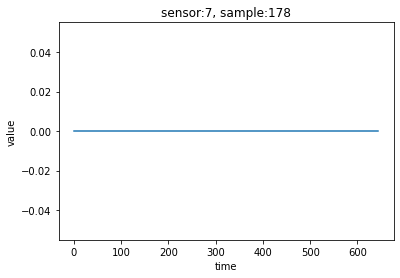

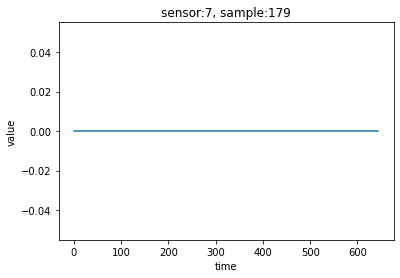

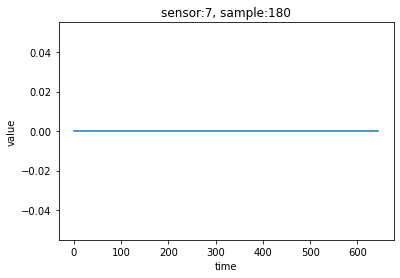

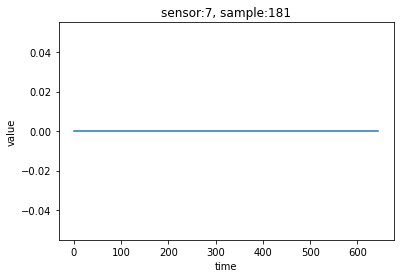

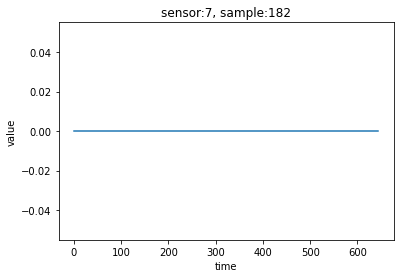

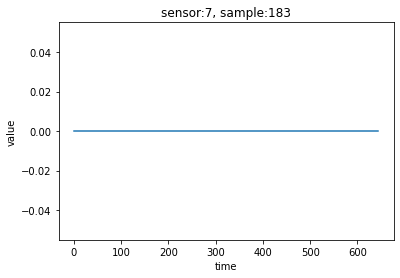

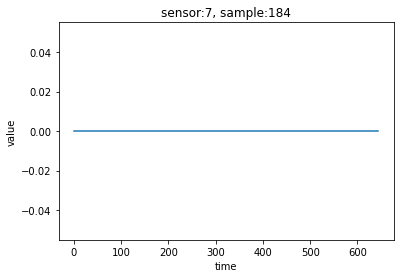

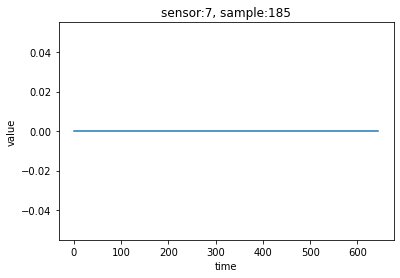

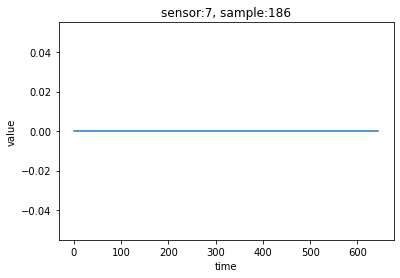

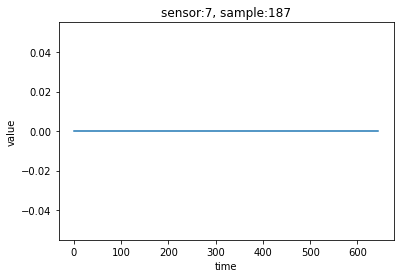

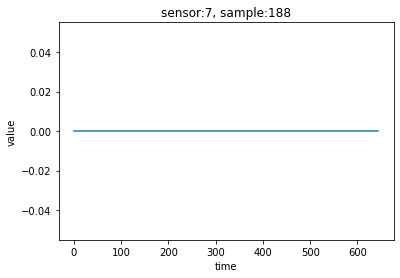

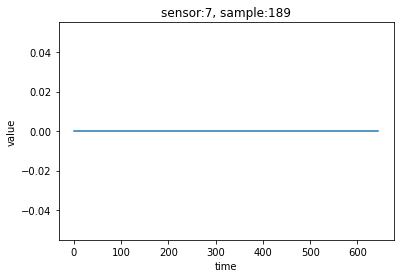

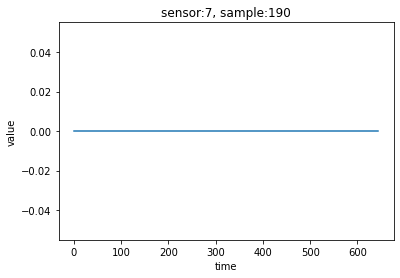

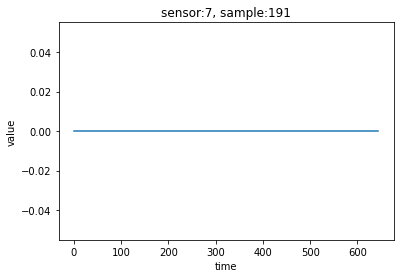

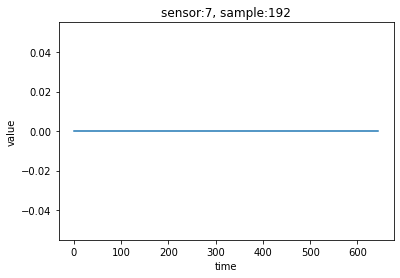

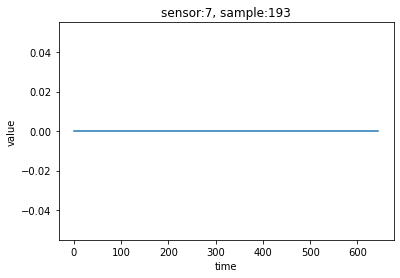

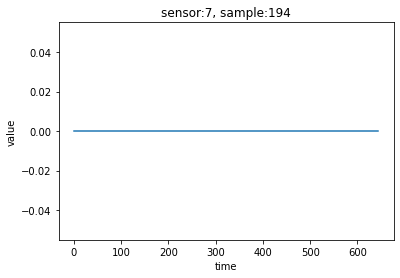

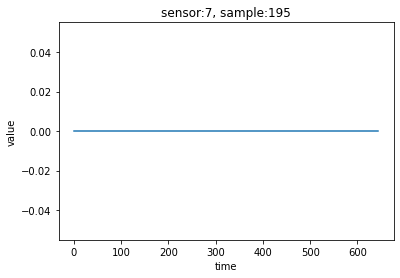

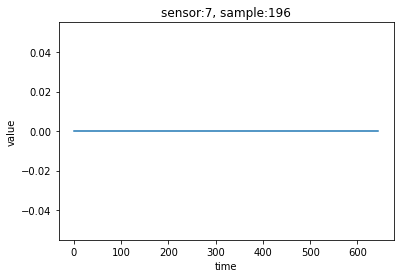

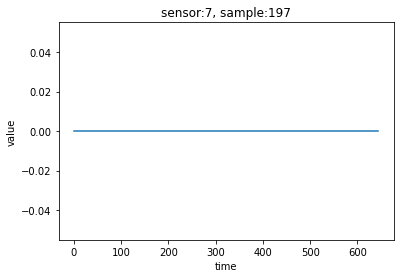

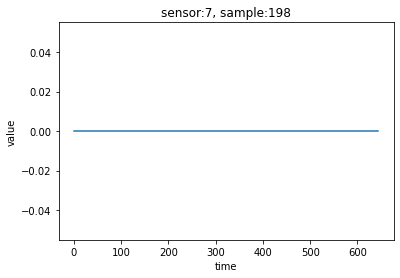

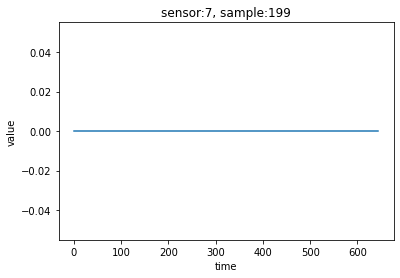

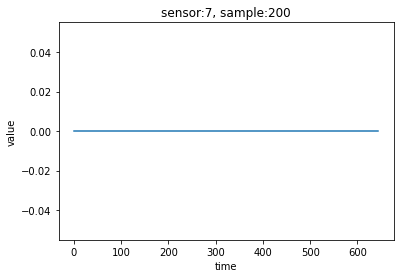

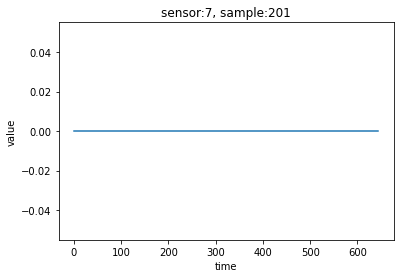

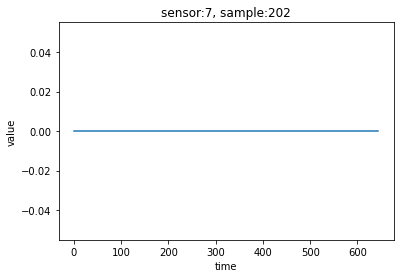

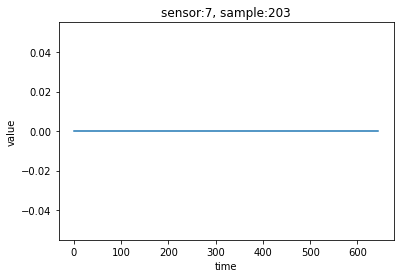

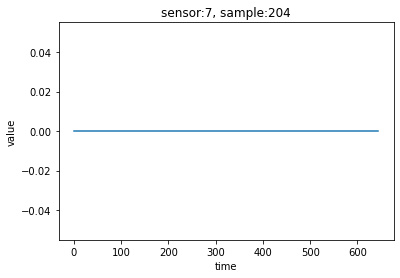

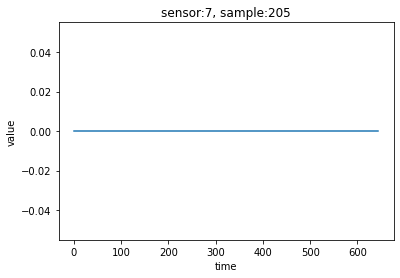

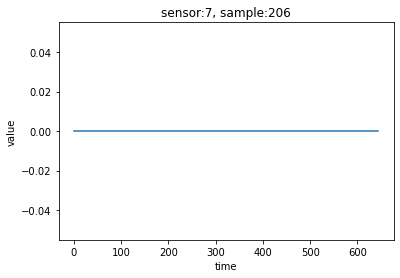

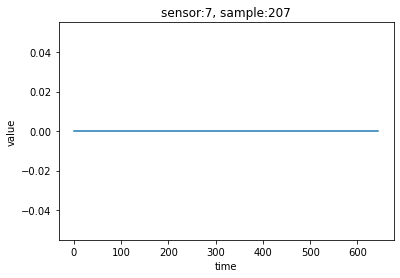

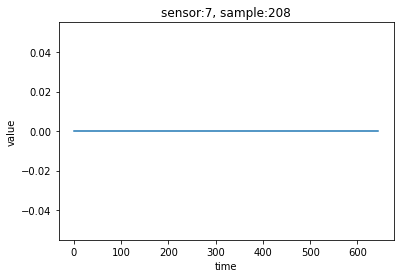

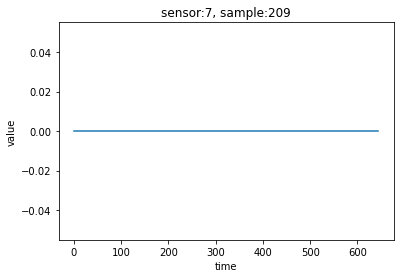

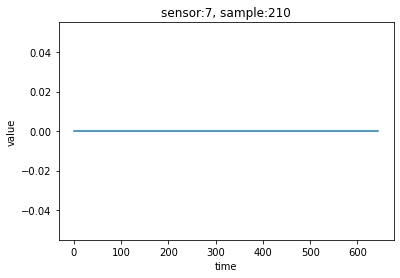

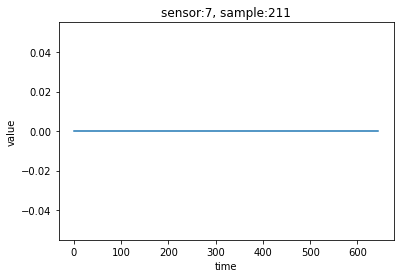

In [10]:
for sensor in range(old_data_x.shape[1]):
    for sample in range(old_data_x.shape[0]-1):
        ts = old_data_x[sample, sensor, :]
        if ts.max() - ts.min() < 0.1:
            plt.plot(old_data_x[sample, sensor, :])
            plt.xlabel('time')
            plt.ylabel('value')
            plt.title('sensor:{}, sample:{}'.format(sensor, sample))
            plt.show()

In [11]:
old_data_x.shape

(213, 8, 645)

### 新数据

(815, 1500, 18)

815个样本，1500个采样点，18个传感器

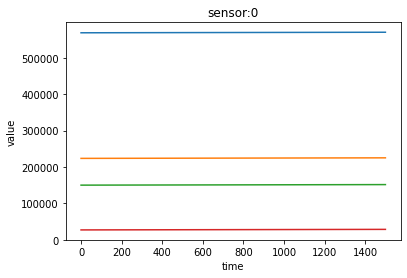

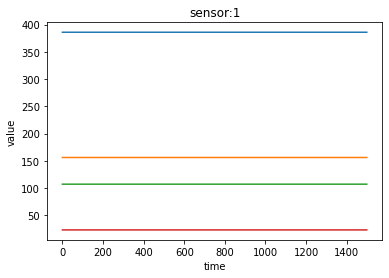

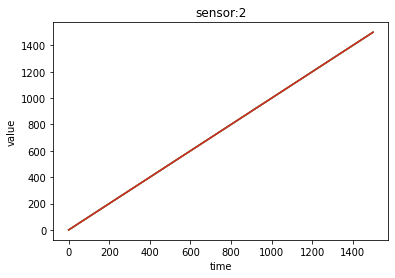

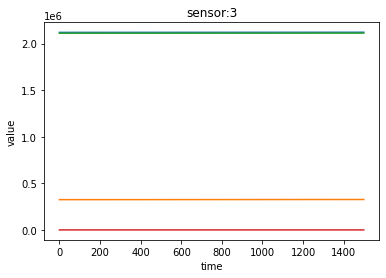

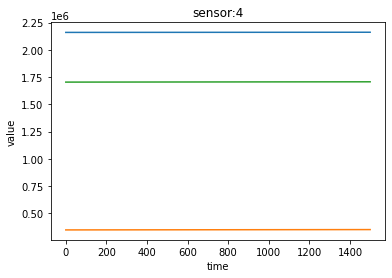

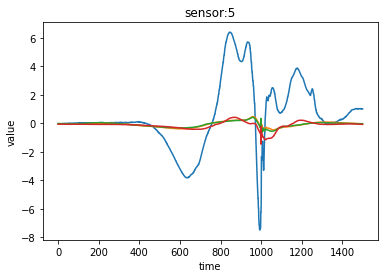

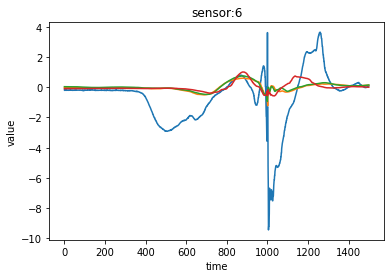

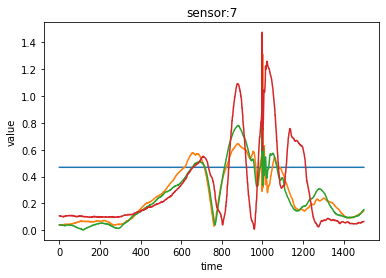

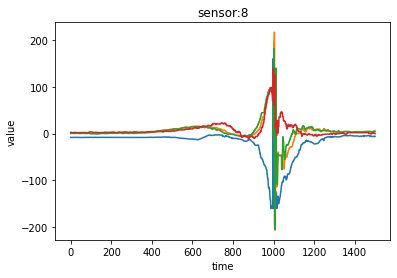

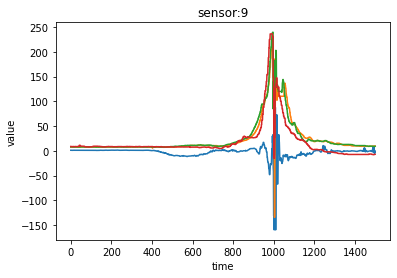

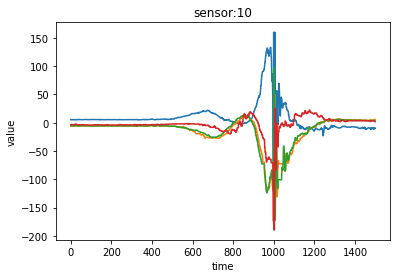

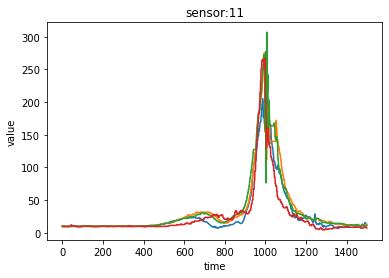

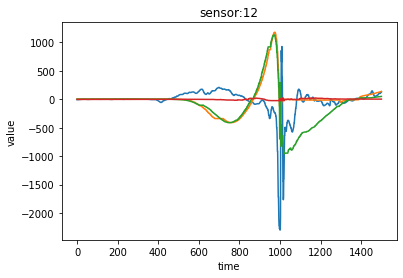

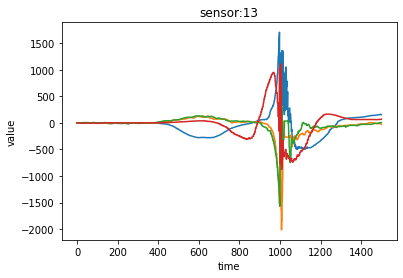

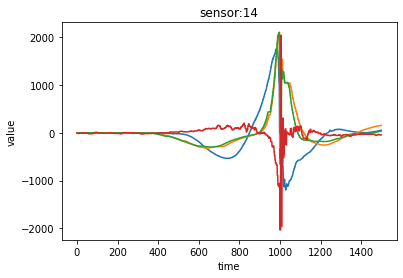

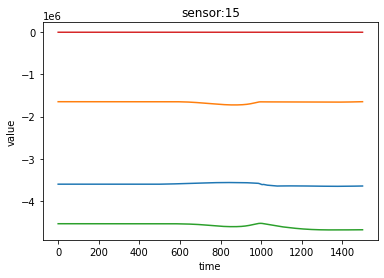

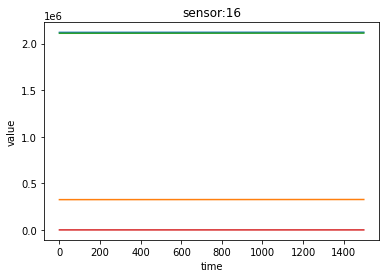

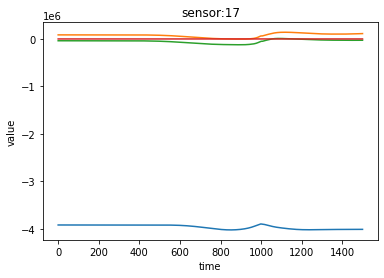

In [12]:
num_samples = 4
samples = np.random.randint(new_data_x.shape[0]-1, size=num_samples)
for sensor in range(new_data_x.shape[2]):
    for sample in samples:
        plt.plot(new_data_x[sample, :, sensor])
    plt.xlabel('time')
    plt.ylabel('value')
    plt.title('sensor:{}'.format(sensor))
    plt.show()

**舍弃0，1，2，3，4，15，16，17号传感器**

In [13]:
new_data_x = np.delete(new_data_x, (0, 1, 2, 3, 4, 15, 16, 17), axis=2)

**标准化**

In [14]:
std = MinMaxScaler()
for sensor in range(10):
    old_data_x[:, :, sensor] = std.fit_transform(old_data_x[:, :, sensor].T).T

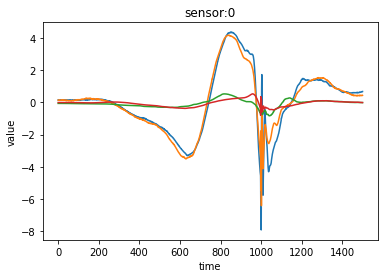

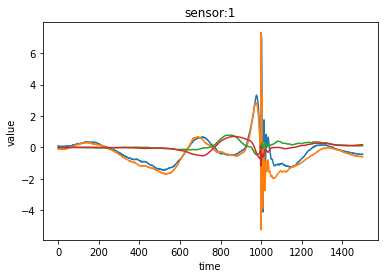

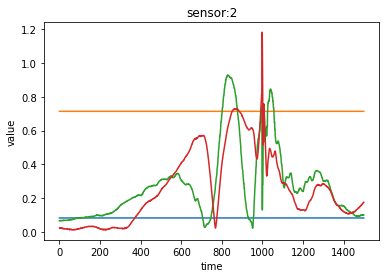

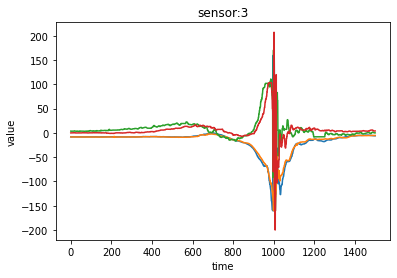

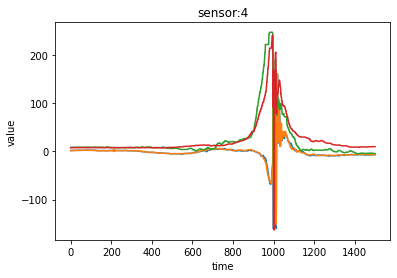

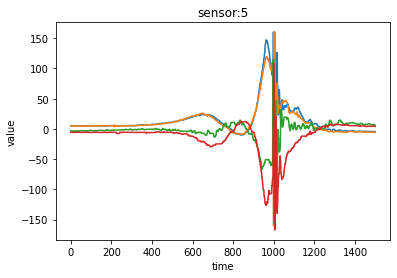

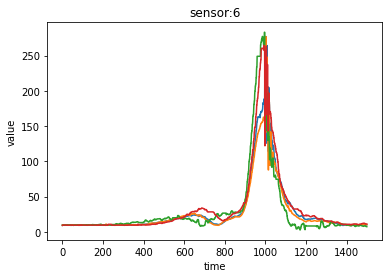

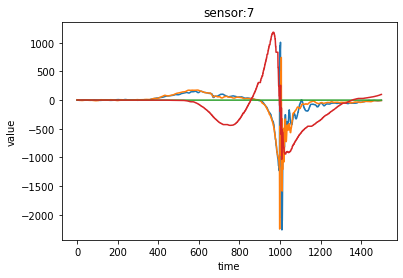

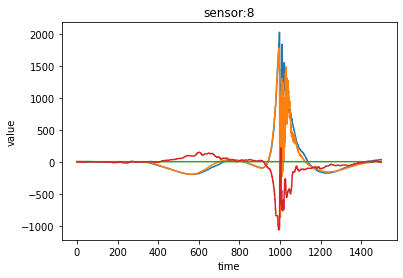

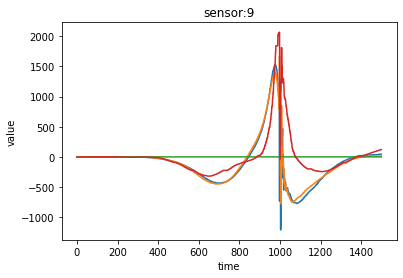

In [15]:
num_samples = 4
samples = np.random.randint(new_data_x.shape[0]-1, size=num_samples)
for sensor in range(new_data_x.shape[2]):
    for sample in samples:
        plt.plot(new_data_x[sample, :, sensor])
    plt.xlabel('time')
    plt.ylabel('value')
    plt.title('sensor:{}'.format(sensor))
    plt.show()

# 保存数据

In [18]:
np.save("../golf_dataset/olddata/old_data_preprocess_no_aug.npy", old_data_x)

In [19]:
np.save("../golf_dataset/newdata/new_data_preprocess_no_aug.npy", new_data_x)

## 读取清洗后的数据

In [2]:
import numpy as np
old_data_x = np.load("../golf_dataset/olddata/old_data_preprocess_no_aug.npy")

In [3]:
print(old_data_x.shape)

(213, 8, 645)


In [5]:
mean_data = old_data_x.mean(axis=0)
print(mean_data.shape)

(8, 645)


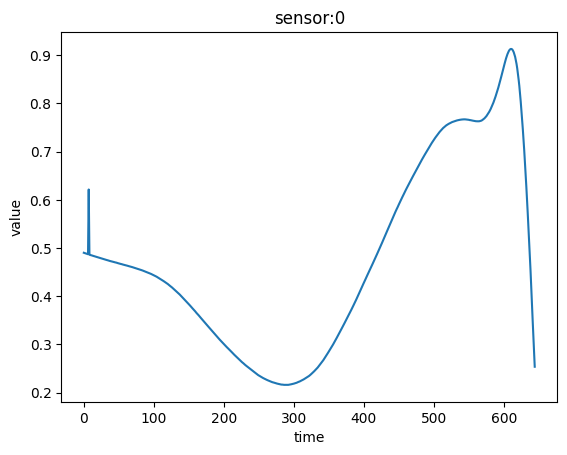

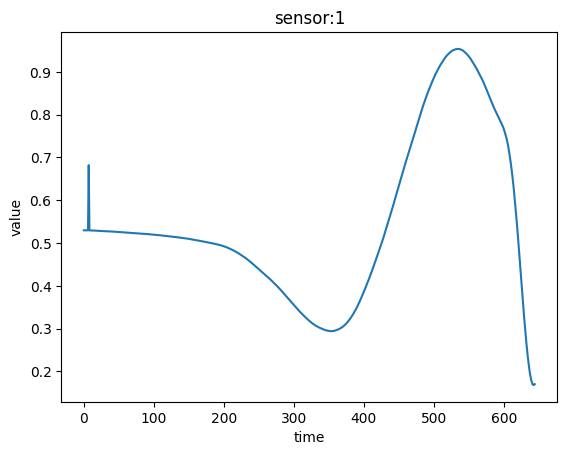

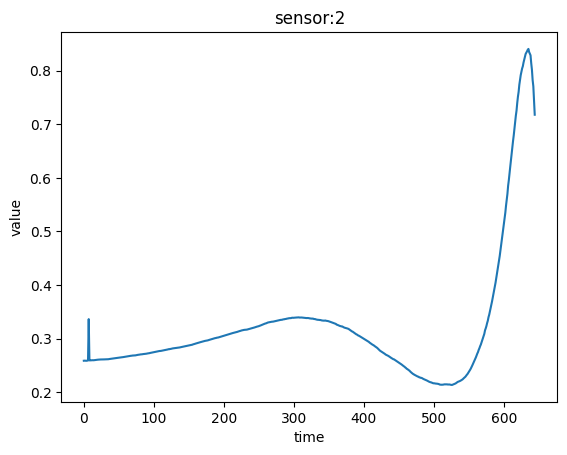

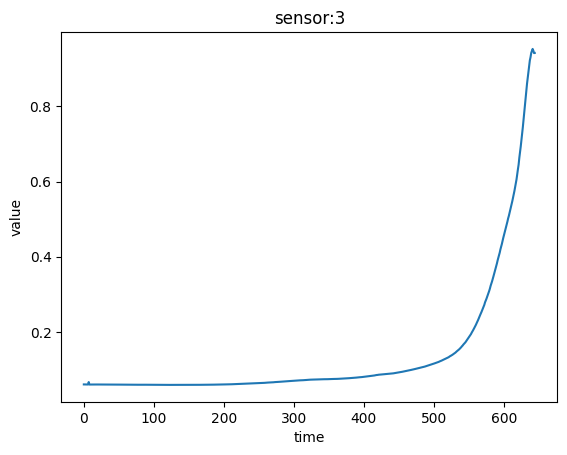

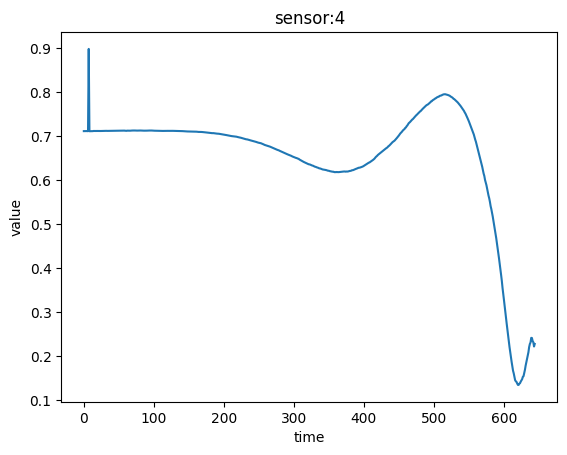

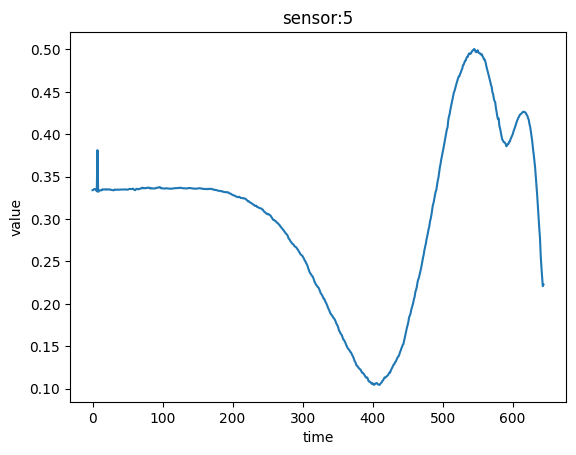

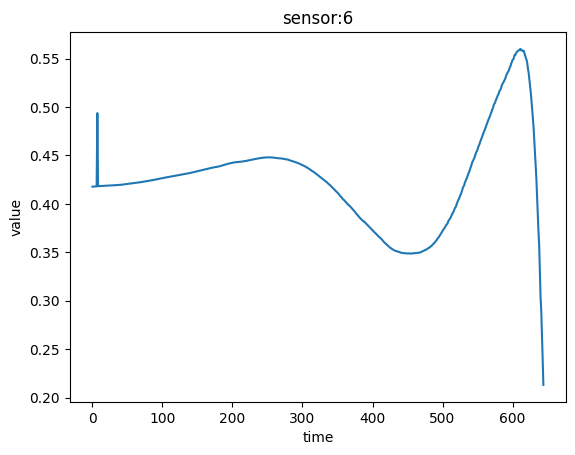

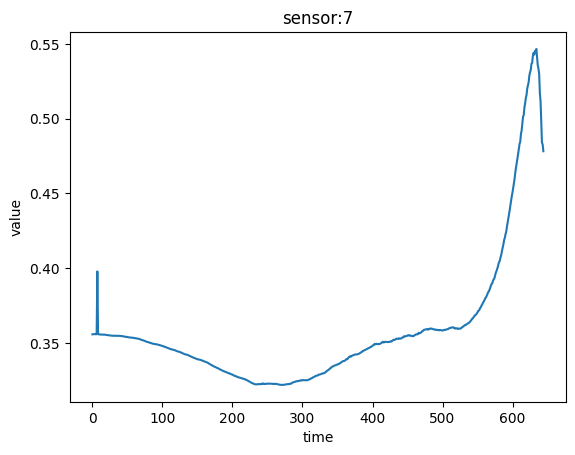

In [7]:
import matplotlib.pyplot as plt

for sensor in range(old_data_x.shape[1]):
    plt.plot(mean_data[sensor, :])
    plt.xlabel('time')
    plt.ylabel('value')
    plt.title('sensor:{}'.format(sensor))
    plt.show()